Checking for missing values:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


<ipython-input-12-6de2453c89b7>:26: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  X['Formatted Date'] = pd.to_datetime(X['Formatted Date'],format = '%Y-%m-%d %H:%M:%S.%f %z')
<ipython-input-12-6de2453c89b7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Formatted Date'] = pd.to_datetime(X['Formatted Date'],format = '%Y-%m-%d %H:%M:%S.%f %z')
<ipython-input-12-6de2453c89b7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

MaeForest: 0.8470614285714275
MaeTree: 1.156188888888889
MaeSGD: 4.670569509550634


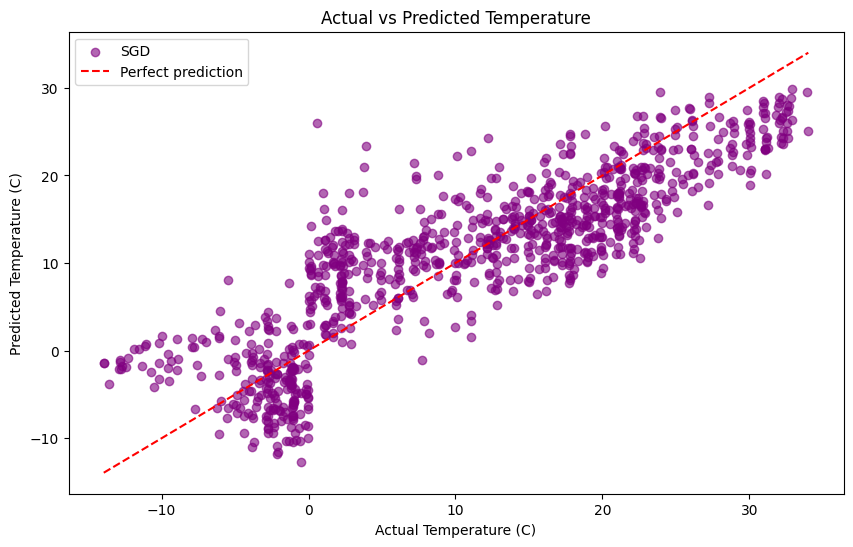

'\n\ndef get_user_input():\n    formatted_date = input("Enter Formatted Date (example : 2016-09-28 13:00:00): ")\n    precip_type = input("Enter Precip Type (e.g., rain, snow, none): ")\n    summary = input("Enter Summary: ")\n    humidity = float(input("Enter Humidity (%): "))\n    wind_speed = float(input("Enter Wind Speed (km/h): "))\n    visibility = float(input("Enter Visibility (km): "))\n\n\n    user_data = pd.DataFrame({\n        \'Formatted Date\': [formatted_date],\n        \'Precip Type\': [precip_type],\n        \'Summary\': [summary],\n        \'Humidity\': [humidity],\n        \'Wind Speed (km/h)\': [wind_speed],\n        \'Visibility (km)\': [visibility]\n    })\n    \n    return user_data\n\n\ndef preprocess_user_input(user_data, scaler, model):\n\n    user_data[\'Formatted Date\'] = pd.to_datetime(user_data[\'Formatted Date\'], errors=\'coerce\')\n    \n\n    if user_data[\'Formatted Date\'].isnull().any():\n        raise ValueError("Invalid date format in user input, 

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


weatherfilepath = '/kaggle/input/weatherdata4/weatherHistory.csv'
featurenames = ['Formatted Date', 'Precip Type','Summary', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']
weatherdata = pd.read_csv(weatherfilepath, nrows=5000)

print("Checking for missing values:")
print(weatherdata.isnull().sum())


weatherdata = weatherdata.dropna(subset=featurenames)

y = weatherdata['Temperature (C)']
X = weatherdata[featurenames]


X['Formatted Date'] = pd.to_datetime(X['Formatted Date'],format = '%Y-%m-%d %H:%M:%S.%f %z')
X['Hour'] = X['Formatted Date'].apply(lambda x: x.hour)
X['Month'] = X['Formatted Date'].apply(lambda x: x.month)
X['Day'] = X['Formatted Date'].apply(lambda x: x.day)
X['Year'] = X['Formatted Date'].apply(lambda x: x.year)


X = X.drop(columns=['Formatted Date'])


X = pd.get_dummies(X, columns=['Precip Type', 'Summary'], drop_first=True)


train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)


weathermodelForest = RandomForestRegressor(random_state=0,n_estimators = 350,max_depth=37,min_samples_leaf=1)
weathermodelTree = DecisionTreeRegressor(random_state = 0)
weathermodelSGD = SGDRegressor(random_state = 0, alpha = 0.001, eta0 = 0.001, max_iter = 250, tol = 1e-05)
weathermodelForest.fit(train_X_scaled, train_y)
weathermodelTree.fit(train_X_scaled, train_y)
weathermodelSGD.fit(train_X_scaled, train_y)

predictionsForest = weathermodelForest.predict(val_X_scaled)
predictionsTree = weathermodelTree.predict(val_X_scaled)
predictionsSGD = weathermodelSGD.predict(val_X_scaled)
maeForest = mean_absolute_error(val_y, predictionsForest)
maeTree = mean_absolute_error(val_y, predictionsTree)
maeSGD = mean_absolute_error(val_y, predictionsSGD)
print(f'MaeForest: {maeForest}')
print(f'MaeTree: {maeTree}')
print(f'MaeSGD: {maeSGD}')


plt.figure(figsize=(10, 6))
#plt.scatter(val_y, predictionsForest, alpha=0.6,label="RandomForest")
#plt.scatter(val_y, predictionsTree, alpha=0.6,label="DecisionTree",color="green")
plt.scatter(val_y, predictionsSGD, alpha=0.6,label="SGD",color="purple")
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], '--r', label="Perfect prediction")
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')
plt.legend(labels=["SGD","Perfect prediction"])

plt.show()

'''

def get_user_input():
    formatted_date = input("Enter Formatted Date (example : 2016-09-28 13:00:00): ")
    precip_type = input("Enter Precip Type (e.g., rain, snow, none): ")
    summary = input("Enter Summary: ")
    humidity = float(input("Enter Humidity (%): "))
    wind_speed = float(input("Enter Wind Speed (km/h): "))
    visibility = float(input("Enter Visibility (km): "))


    user_data = pd.DataFrame({
        'Formatted Date': [formatted_date],
        'Precip Type': [precip_type],
        'Summary': [summary],
        'Humidity': [humidity],
        'Wind Speed (km/h)': [wind_speed],
        'Visibility (km)': [visibility]
    })
    
    return user_data


def preprocess_user_input(user_data, scaler, model):

    user_data['Formatted Date'] = pd.to_datetime(user_data['Formatted Date'], errors='coerce')
    

    if user_data['Formatted Date'].isnull().any():
        raise ValueError("Invalid date format in user input, use the correct datetime format")
    
    user_data['Hour'] = user_data['Formatted Date'].dt.hour
    user_data['Month'] = user_data['Formatted Date'].dt.month
    user_data['Day'] = user_data['Formatted Date'].dt.day
    user_data['Year'] = user_data['Formatted Date'].dt.year
    

    user_data = user_data.drop(columns=['Formatted Date'])
    

    user_data = pd.get_dummies(user_data, columns=['Precip Type', 'Summary'], drop_first=True)
    

    missing_cols = set(train_X.columns) - set(user_data.columns)
    for col in missing_cols:
        user_data[col] = 0
    

    user_data = user_data[train_X.columns]
    

    user_data_scaled = scaler.transform(user_data)
    
    return user_data_scaled


user_data = get_user_input()
user_data_scaled = preprocess_user_input(user_data, scaler, weathermodel)


predicted_temp = weathermodel.predict(user_data_scaled)

print(f"Predicted Temperature: {predicted_temp[0]:.2f}°C")
'''
